# A simple clustering exercise of Fund Programs

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

xls=pd.ExcelFile('Cluster Fund Programs.xlsx')
df=pd.read_excel(xls,'Program countries complete')

In [364]:
df.head(5)

,country_name,country_code,country_iso_3_code,code,region,arrangement_type,year,bca_gdp_bp6,bfd_gdp_bp6,d_gdp,...,trade_openness,fragile,prg_length,eff,sba,pll,ecf,esf,scf,blend
0,Greece,174,GRC,1742010,EUR,SBA,2010,-11.384279,0.410121,184.71552,...,0.461573,0,2,0,1,0,0,0,0,0
1,Greece,174,GRC,1742012,EUR,EFF,2012,-3.831144,-0.432627,241.83867,...,0.552324,0,4,1,1,0,0,0,0,0
2,Iceland,176,ISL,1762008,EUR,SBA,2008,-22.599819,-29.030277,179.86908,...,1.261656,0,3,0,1,0,0,0,0,0
3,Ireland,178,IRL,1782010,EUR,EFF,2010,-1.197674,-9.715908,1039.38540,...,1.158331,0,3,1,0,0,0,0,0,0
4,Portugal,182,PRT,1822011,EUR,EFF,2011,-6.001705,2.453360,207.26927,...,0.760186,0,3,1,0,0,0,0,0,0


In [365]:
#matrix size
df.shape

(177, 38)

## Metadata from STATA

    Contains data from C:\Users\CIntal\OTmp\master_comparator_data.dta
    obs:         8,299                         
    vars:            39                          20 Feb 2018 20:27
    size:     2,373,514                         
    ---------------------------------------------------------------------------------------------------------------
                  storage   display    value
    variable name   type    format     label      variable label
    --------------------------------------------------------------------------------------------------------------
    country_name    str130  %130s                 Country.Name
    country_code    int     %10.0g                Country.Code
    country_iso_3~e str3    %9s                   Country.ISO-3 code
    year            float   %9.0g                 year
    bca_gdp_bp6     float   %8.0g                 Balance on goods and services, percent of GDP in U.S. dollars
    bfd_gdp_bp6     float   %8.0g                 Direct investment, (BPM6), percent of GDP in U.S. dollars
    d_gdp           float   %8.0g                 Total external debt, gross, percent of GDP in U.S. dollars
    ggxcnl_gdp      float   %8.0g                 General govt net lending/borrowing, national currency, percent
                                                    of fiscal year GDP
    ggxofb_gdp      float   %8.0g                 General government overall fiscal balance, percent of Fiscal
                                                    year GDP
    ggxwdg_gdp      float   %8.0g                 General government gross debt, percent of Fiscal year GDP
    iar_gdp_bp6     float   %8.0g                 Reserve Assets (Inc. reserve position in the Fund and SDR 
                                                    holdings), percent of GDP in U.S. dollars
    ngdpd           float   %8.0g                 Gross domestic product, current prices in U.S. dollars
    ngdpdpc         float   %8.0g                 Gross domestic product per capita, current prices in U.S. dollars
    ngdp_rpch       float   %8.0g                 GDP, constant prices in national currency, percent change
    pcpie_pch       float   %8.0g                 Consumer Prices, end-of-period, percent change
    PRGT            int     %10.0g                Dummy
    gra_credit      double  %10.0g                GRA Credit Outstanding
    prgt_credit     long    %10.0g                PRGT Credit Outstanding
    quota           double  %10.0g                Quota
    arrangement_t~e str16   %16s                  Arrangement Type
    exceptional_a~s byte    %10.0g                Exceptional Access
    precautionary   byte    %10.0g                Precautionary (Using MONA)
    actual_expiry   int     %10.0g                Actual Expiry Year
    post2011        float   %9.0g                
    region          str6    %9s                   Region
    small_state     byte    %10.0g                Small State
    fuel_exporter   byte    %10.0g                Fuel Exporter
    exchange_rate   float   %9.0g                
    trade_openness  float   %9.0g                
    fragile         byte    %10.0g               
    iip             double  %10.0g               
    prg_length      float   %9.0g                 Program Length
    eff             float   %9.0g                
    sba             float   %9.0g                
    pll             float   %9.0g                
    ecf             float   %9.0g                
    esf             float   %9.0g                
    scf             float   %9.0g                
    blend           float   %9.0g    
    DCP             float   %9.0g                 Domestic Credit to the Private Sector (% of GDP)

    ICRG variables added:
    Bureaucracy Quality (L)
    Corruption (F)
    Democratic Accountability (K)
    Ethnic Tensions (J)
    External Conflict (E)
    Government Stability (A)
    Internal Conflict (D)
    Investment Profile (C)
    Law & Order (I)
    Military in Politics (G)
    Religious Tensions (H)
    Socioeconomic Conditions (B)

    --------------------------------------------------------------------------------------------------------------

    Sorted by: country_code  year

## To do list:
1) Regularize  
2) Straightforward clustering    
3) Dimensionality reduction - PCA  
4) Try LASSO on a poission regression  (predicting program membership)

#### Regularization

In [366]:
#columns seven until thirtyeight
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, 6:38])
df1=pd.DataFrame(X_scaled)
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.069220,-0.475464,0.974506,1.239401,-1.567582,2.109970,-1.403574,3.273165,3.348084,-1.918951,...,-0.282315,-0.460791,-0.693703,-0.396059,1.064204,-0.131306,-0.828079,-0.075378,-0.26968,-0.244704
1,0.420855,0.354267,0.822600,1.841674,-0.685492,2.428987,-1.322931,2.579774,2.643713,-2.329907,...,0.022864,-0.460791,1.423288,2.524876,1.064204,-0.131306,-0.828079,-0.075378,-0.26968,-0.244704
2,-0.559294,-1.707519,-4.332155,1.188302,-1.917889,0.215903,0.299452,-0.343698,7.502872,-0.309169,...,2.408233,-0.460791,0.364792,-0.396059,1.064204,-0.131306,-0.828079,-0.075378,-0.26968,-0.244704
3,-0.069220,0.643561,-0.850720,10.250546,-5.554165,0.670543,-1.516457,2.278966,6.531677,-0.286216,...,2.060769,-0.460791,0.364792,2.524876,-0.939669,-0.131306,-0.828079,-0.075378,-0.26968,-0.244704
4,0.175818,0.115826,1.342802,1.477194,-0.838561,1.276076,-0.698673,2.570968,2.797095,-1.095366,...,0.721871,-0.460791,0.364792,2.524876,-0.939669,-0.131306,-0.828079,-0.075378,-0.26968,-0.244704


### Trial 1: Straightforward Clustering

In [367]:
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from collections import Counter
import random
from sklearn import cluster, metrics

**First, we must determine how many clusters we need.**

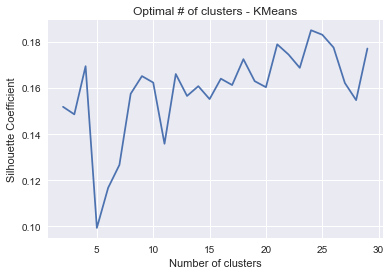

In [368]:
# calculate SC for K=2 through K=15
k_range = range(2, 30)
scores = []
for k in k_range:
    km = cluster.KMeans(n_clusters=k, random_state=12)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Optimal # of clusters - KMeans')
plt.grid(True)

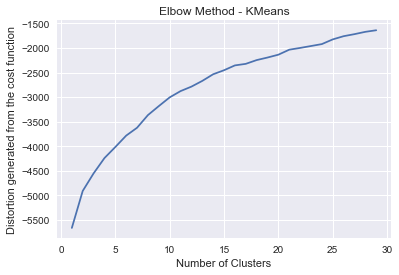

In [369]:
from sklearn.cluster import KMeans
import pylab as pl
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Distortion generated from the cost function')
pl.title('Elbow Method - KMeans')
pl.show()

Maxes out at around 24 clusters? But am not convinced. Let's try other methods.

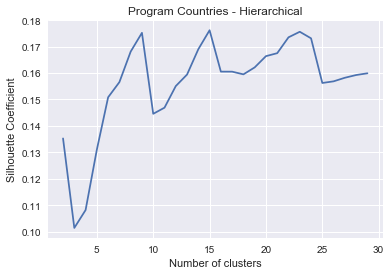

In [370]:
# calculate SC for K=2 through K=30
from sklearn.cluster import AgglomerativeClustering
k_range = range(2, 30)
scores = []
for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, hc.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Program Countries - Hierarchical')
plt.grid(True)

Result is worse than K-Means. Multimodal # of clusters.  Note that 24-cluster result is consistent with K-Means.

In [371]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_scaled)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

df['cluster'] = ms.labels_
df.sort_values(by='cluster')
writer = pd.ExcelWriter('Test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='MS')
writer.save()

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
labels = ms.labels_
print(Counter(labels))

number of estimated clusters : 6
Counter({0: 164, 2: 5, 1: 3, 3: 3, 4: 1, 5: 1})


Meanshift clustering seems unreliable.  Six clusters and first blob has 164 countries.

#### Testing K-Means on 24 clusters.

In [372]:
# K-means with 8 clusters on scaled data
km = cluster.KMeans(n_clusters=24, random_state=14)
km.fit(X_scaled)
df['cluster'] = km.labels_
df.sort_values(by='cluster')

writer = pd.ExcelWriter('Test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='KM')
writer.save()

labels = km.labels_
print(Counter(labels))

Counter({3: 30, 2: 29, 12: 18, 11: 16, 1: 13, 10: 11, 7: 9, 4: 8, 8: 7, 9: 6, 6: 5, 13: 4, 15: 4, 0: 3, 5: 3, 18: 2, 19: 2, 14: 1, 16: 1, 17: 1, 20: 1, 21: 1, 22: 1, 23: 1})


In [373]:
# Supplementary: run Hierarchical clustering
# Fit an estimator
hc = AgglomerativeClustering(n_clusters=24)
hc.fit(X_scaled)

# Clusters are given in the labels_ attribute
df['cluster'] = hc.labels_
df.sort_values(by='cluster')
writer = pd.ExcelWriter('Test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='HC')
writer.save()

labels = hc.labels_
print(Counter(labels))

Counter({0: 41, 7: 16, 1: 15, 3: 13, 8: 12, 9: 12, 4: 9, 10: 9, 21: 8, 2: 6, 5: 5, 12: 5, 6: 4, 11: 4, 19: 4, 15: 3, 23: 3, 14: 2, 13: 1, 16: 1, 17: 1, 18: 1, 20: 1, 22: 1})


## Trial 2. PCA (dimensionality reduction), then Clustering

In [374]:
#Grabbing metadata for future use
metadata=df.iloc[:, 0:7]
metadata.head(5)

,country_name,country_code,country_iso_3_code,code,region,arrangement_type,year
0,Greece,174,GRC,1742010,EUR,SBA,2010
1,Greece,174,GRC,1742012,EUR,EFF,2012
2,Iceland,176,ISL,1762008,EUR,SBA,2008
3,Ireland,178,IRL,1782010,EUR,EFF,2010
4,Portugal,182,PRT,1822011,EUR,EFF,2011


In [375]:
#define X as the features; y as the program

X = df.iloc[:,6:38].values
y = df.iloc[:,5].values #beginning in value 6

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [376]:
#Define correlation matrix and perform eigendecomposition
cor_mat1 = np.corrcoef(X_std.T) #correlations of standardized data
cor_mat2 = np.corrcoef(X.T) #correlations of raw data

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.2410973  -0.31903935  0.19321765 ..., -0.05899206  0.1531666
   0.0265627 ]
 [ 0.13099551  0.13894946  0.29962328 ..., -0.00703226 -0.23920483
  -0.39874972]
 [ 0.09139911  0.11518549  0.4123479  ...,  0.35762467  0.13424609
   0.42805856]
 ..., 
 [ 0.01140907 -0.02478931 -0.05748059 ..., -0.03288717  0.18041949
   0.02747792]
 [-0.08071353 -0.00324742  0.03206785 ..., -0.00192413  0.01849487
   0.01649185]
 [-0.06463452 -0.04255255  0.13815929 ...,  0.05937132  0.03727646
  -0.04991426]]

Eigenvalues 
[  5.46680433e+00   3.58587790e+00   2.83299474e+00   2.39004297e+00
   1.98489528e+00   1.64097674e+00   1.41988720e+00   1.30247279e+00
   1.23630977e+00   1.09178830e+00   1.05309312e+00   9.00556037e-01
   7.84771345e-01   7.19023856e-01   6.92069997e-16   6.52335939e-01
   6.12701865e-01   5.66590354e-01   5.42413442e-01   3.36911464e-02
   4.60324076e-01   4.33943485e-01   9.44448015e-02   1.21185612e-01
   1.46595555e-01   3.79732654e-01   1.89211211e-01   3.313

In [377]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.46680433386
3.58587790102
2.83299473825
2.39004296843
1.98489528387
1.64097673701
1.41988719714
1.30247278599
1.23630977189
1.09178830356
1.05309311798
0.900556037204
0.784771344878
0.719023856293
0.652335939207
0.612701865486
0.566590353806
0.542413442189
0.460324076493
0.433943484705
0.379732654194
0.331359427455
0.296645805015
0.277145507626
0.231852486281
0.220332255277
0.189211210861
0.146595554522
0.121185611624
0.0944448014836
0.0336911464176
6.92069996658e-16


In [378]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

x_bar= ['PC %s'%i for i in range(1,21)]
y_bar= var_exp[:20]

x_line= ['PC %s' %i for i in range(1,21)] 
y_line= cum_var_exp[:20]

chart = pd.DataFrame(
    {'pca #1': x_bar,
     'variance explained': y_bar,
     'pca#2':x_line,
     'cumulative variance':y_line,
    })

print(chart)

    cumulative variance pca #1  pca#2  variance explained
0             17.083764   PC 1   PC 1           17.083764
1             28.289632   PC 2   PC 2           11.205868
2             37.142741   PC 3   PC 3            8.853109
3             44.611625   PC 4   PC 4            7.468884
4             50.814423   PC 5   PC 5            6.202798
5             55.942475   PC 6   PC 6            5.128052
6             60.379622   PC 7   PC 7            4.437147
7             64.449850   PC 8   PC 8            4.070227
8             68.313318   PC 9   PC 9            3.863468
9             71.725156  PC 10  PC 10            3.411838
10            75.016072  PC 11  PC 11            3.290916
11            77.830310  PC 12  PC 12            2.814238
12            80.282720  PC 13  PC 13            2.452410
13            82.529670  PC 14  PC 14            2.246950
14            84.568220  PC 15  PC 15            2.038550
15            86.482913  PC 16  PC 16            1.914693
16            

**Am happy with 12 PCAs amounting to 80% variance**

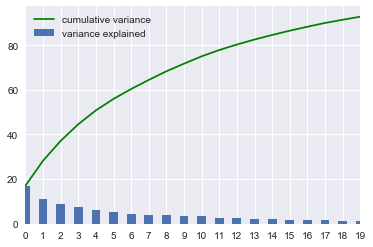

In [387]:
chart['variance explained'].plot(kind='bar')
chart['cumulative variance'].plot(kind='line', color='green')
plt.legend()

In [380]:
from sklearn.decomposition import PCA
from scipy import stats

pca = PCA(n_components=12)
Y_sklearn = pca.fit_transform(X_std)

Now it's time to cluster the 12 PCA components. But first, let's convert to a df and combine with the metadata.

In [381]:
pca_df = pd.DataFrame(Y_sklearn)
#outer join with metadata
#pca_df = pd.concat([metadata, pca_df], axis=1)

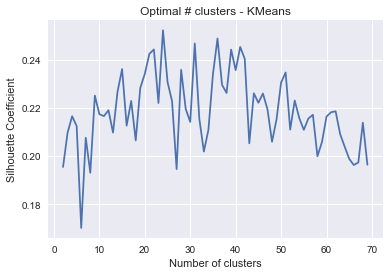

In [382]:
# calculate SC for K=2 through K=70
k_range = range(2, 70)
scores = []
for k in k_range:
    km = cluster.KMeans(n_clusters=k, random_state=12)
    km.fit(pca_df)
    scores.append(metrics.silhouette_score(pca_df, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Optimal # clusters - KMeans')
plt.grid(True)

Still stubborn at 24 clusters.

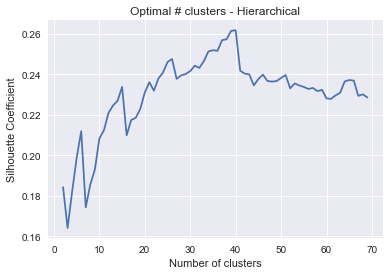

In [383]:
# calculate SC for K=2 through K=70
from sklearn.cluster import AgglomerativeClustering
k_range = range(2, 70)
scores = []
for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(pca_df)
    scores.append(metrics.silhouette_score(pca_df, hc.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Optimal # clusters - Hierarchical')
plt.grid(True)

Hierarchical clusters max out at 40. Isn't that a tad too many?

In [384]:
# K-means has the slightly higher silhouette score.  Proceed with 20 clusters on PCA data
km = cluster.KMeans(n_clusters=20, random_state=14)
km.fit(pca_df)
df['cluster'] = km.labels_
df.sort_values(by='cluster')

writer = pd.ExcelWriter('Test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='PCA_KM')
writer.save()

labels = km.labels_
print(Counter(labels))

Counter({0: 32, 19: 18, 1: 16, 3: 16, 15: 16, 8: 13, 9: 11, 14: 11, 5: 7, 13: 7, 16: 7, 4: 4, 17: 4, 2: 3, 6: 3, 10: 3, 11: 3, 7: 1, 12: 1, 18: 1})


In [385]:
# Fit an estimator
hc = AgglomerativeClustering(n_clusters=40)
hc.fit(pca_df)

# Clusters are given in the labels_ attribute
df['cluster'] = hc.labels_
df.sort_values(by='cluster')
writer = pd.ExcelWriter('Test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='PCA_HC')
writer.save()

labels = hc.labels_
print(Counter(labels))

Counter({0: 24, 15: 16, 4: 12, 1: 11, 6: 11, 5: 9, 20: 9, 10: 8, 9: 6, 3: 4, 7: 4, 11: 4, 13: 4, 22: 4, 31: 4, 12: 3, 14: 3, 16: 3, 17: 3, 23: 3, 28: 3, 2: 2, 8: 2, 18: 2, 19: 2, 21: 2, 24: 2, 30: 2, 32: 2, 33: 2, 34: 2, 25: 1, 26: 1, 27: 1, 29: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1})


References: https://plot.ly/ipython-notebooks/principal-component-analysis/